# ACCRE Project - Question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in fullsample_cleaned.csv as a dataframe
jobs = pd.read_csv("../data/fullsample_cleaned.csv")

In [3]:
# Convert BEGIN and END columns in jobs df to datetime type
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'])
jobs['END'] = pd.to_datetime(jobs['END'])

# Convert REQTIME, USEDTIME, JOBLENGTH columns in jobs df to timedelta type
jobs['REQTIME'] = pd.to_timedelta(jobs['REQTIME'])
jobs['USEDTIME'] = pd.to_timedelta(jobs['USEDTIME'])
jobs['JOBLENGTH'] = pd.to_timedelta(jobs['JOBLENGTH'])

# Count the amount of jobs per hour and create new column
jobs['GROUP1H'] = jobs.groupby(pd.Grouper(key='END',freq='H')).transform('count')['JOBID'].sort_index()

In [8]:
jobs['END'].describe()

<ipython-input-8-6553b4168d73>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  jobs['END'].describe()


count                 7395234
unique                4109550
top       2020-12-18 09:41:23
freq                      559
first     2020-10-01 00:10:15
last      2021-10-07 20:41:11
Name: END, dtype: object

## Question 1: Calculate some descriptive statistics for how many jobs per hour are being completed.

## To-Do List
1. Line Plot of Mean and Median
2. Box plot of hourly completions per month
3. Decide which graph is best for representing the median is more than the mean  (line graphs, stacked bar graphs, box plot, or combo)
4. More In Depth Look Into 3rd Week of September<br>
    a. Look at Memory Usage vs. Required Memory<br>
    b. States of Ended Jobs<br>
    c. Discuss about task utilization
    d. Decide on visualization that will best show this
    e. Look for other trends that could explain the high number of ended jobs in 3rd week of September

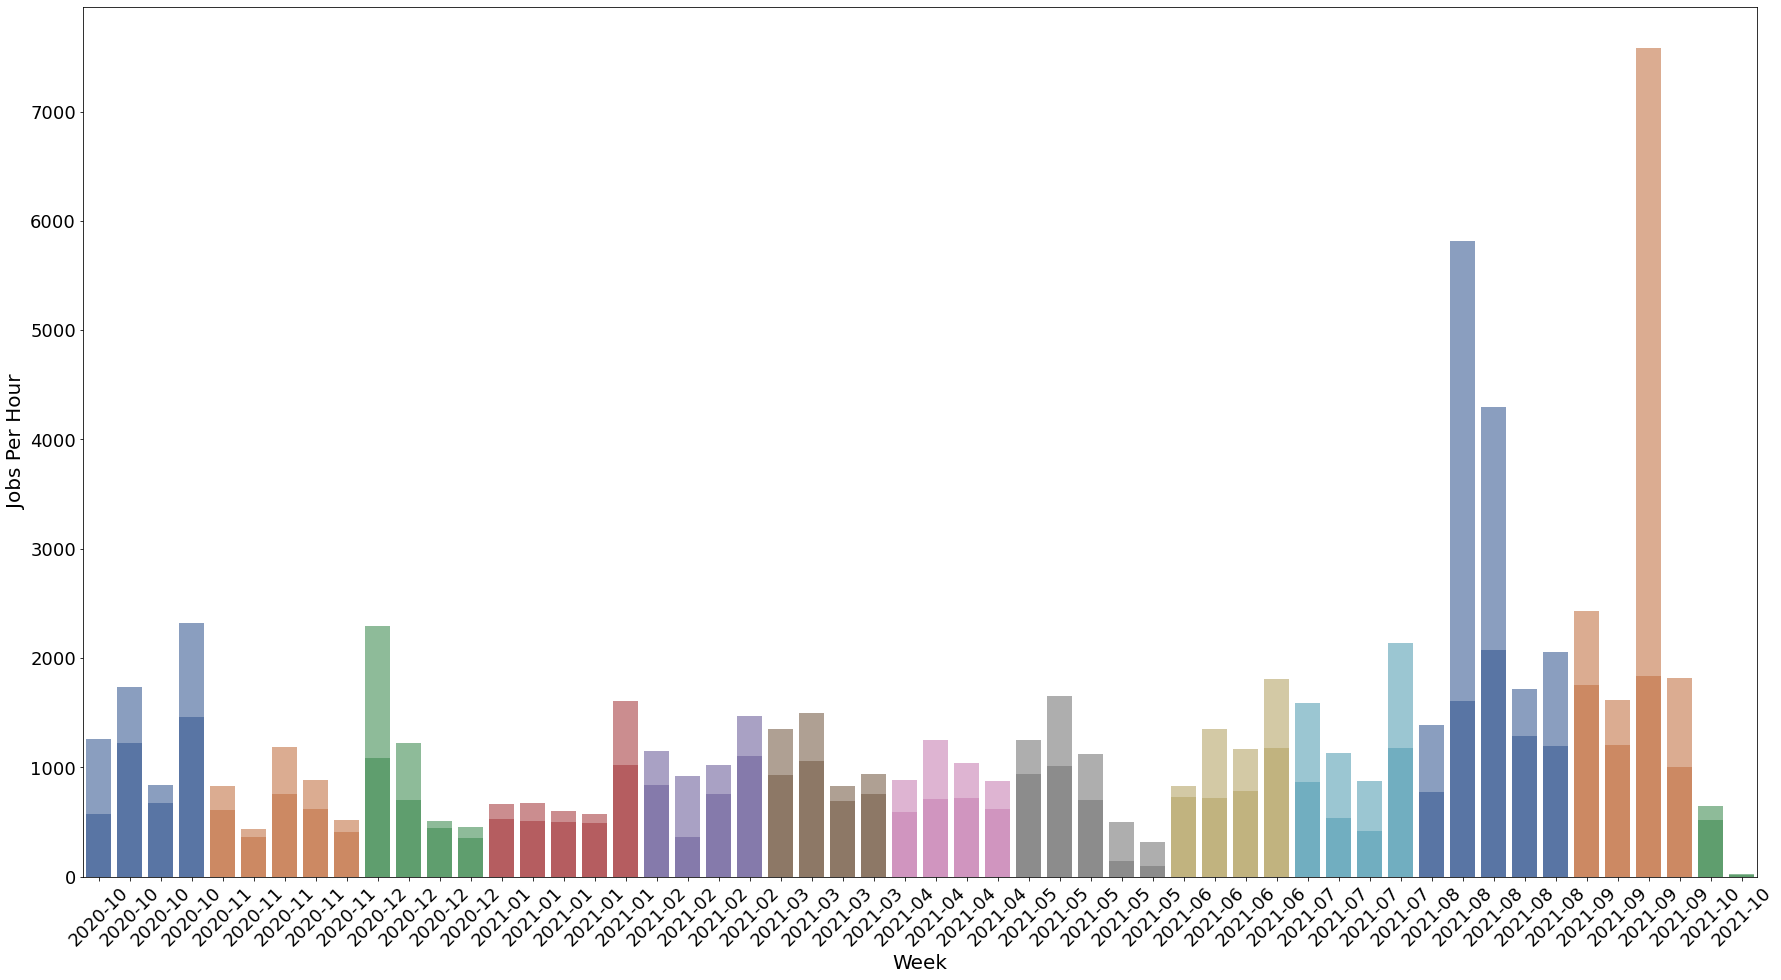

In [5]:
# Median jobs ended per hour each month
weekly_jobs_ended_median = jobs.groupby(pd.Grouper(key='END',freq='W')).median()
weekly_jobs_ended_median = weekly_jobs_ended_median.reset_index()

# Average(mean) jobs ended per hour each month
weekly_jobs_ended_by_hour = jobs.groupby(pd.Grouper(key='END',freq='W')).count()/168
weekly_jobs_ended_by_hour = weekly_jobs_ended_by_hour.reset_index()

# Format date ticks for x axis and define fontsize
date_labels = weekly_jobs_ended_by_hour['END'].dt.strftime('%Y-%m')
fontsize = 20

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30,16))
sns.barplot(x = 'END', 
            y = 'GROUP1H', 
            data = weekly_jobs_ended_median, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = weekly_jobs_ended_by_hour, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax)

plt.xlabel('Week', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 45)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2);

ax.get_legend().set_visible(False);

<ipython-input-7-06bfd8cd1d5c>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = date_labels)


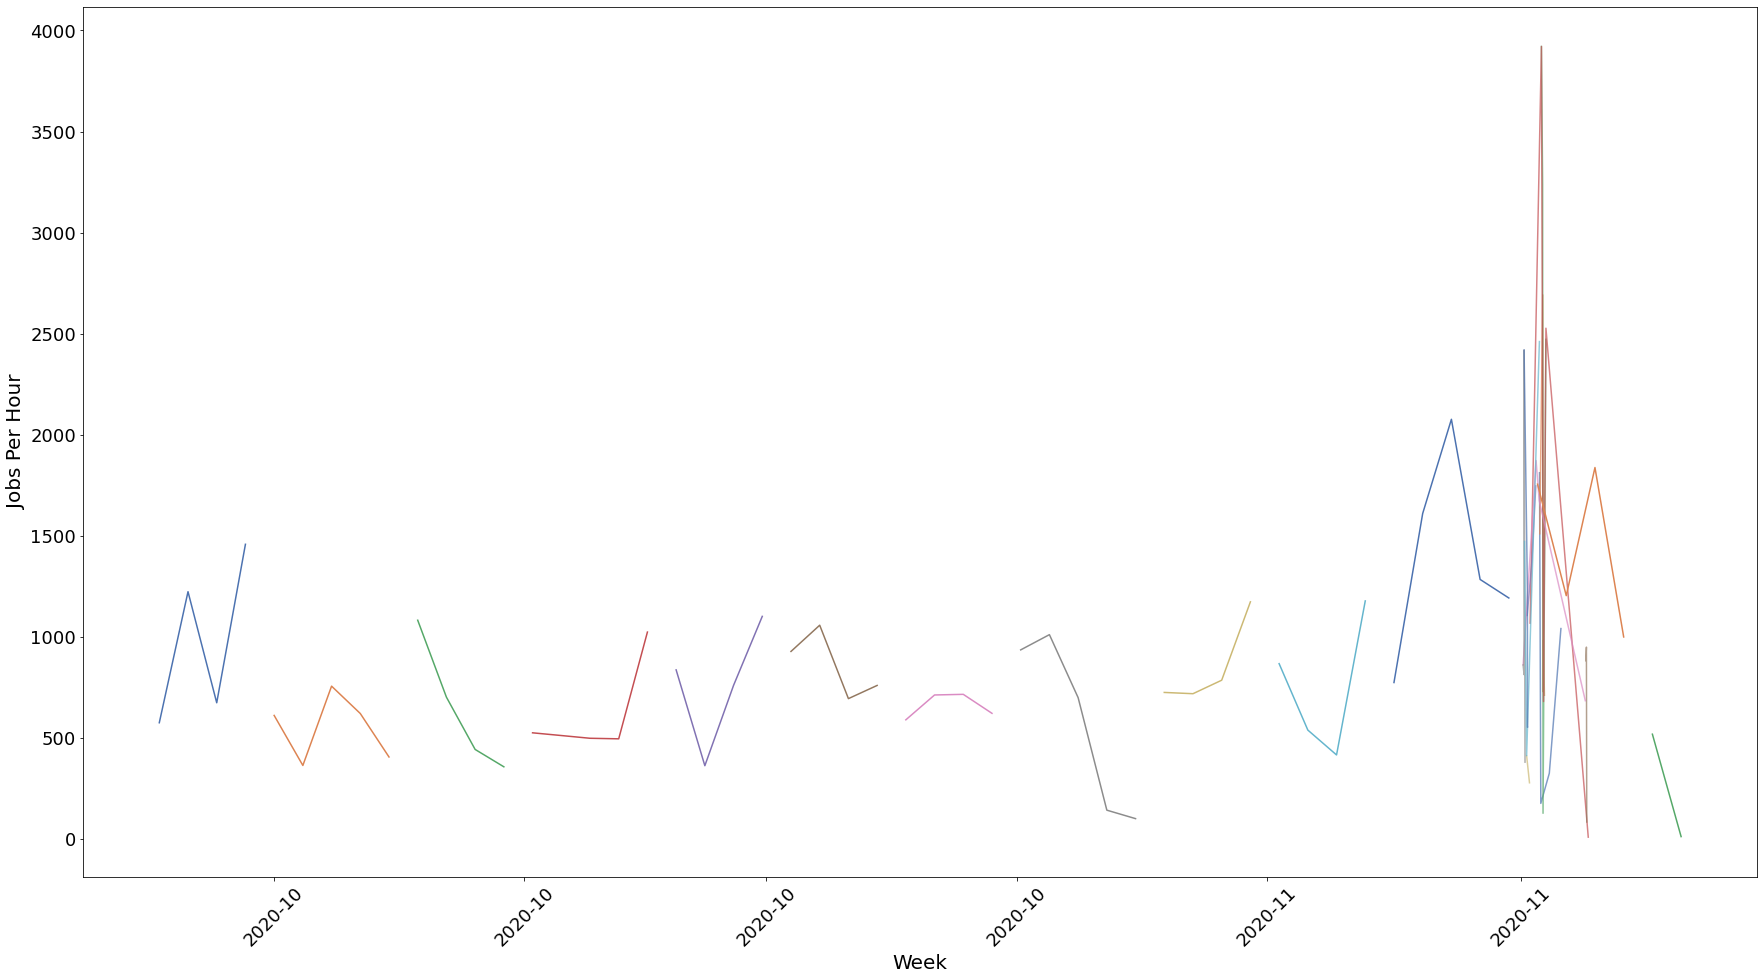

In [7]:
# Median jobs ended per hour each month
weekly_jobs_ended_median = jobs.groupby(pd.Grouper(key='END',freq='W')).median()
weekly_jobs_ended_median = weekly_jobs_ended_median.reset_index()

# Average(mean) jobs ended per hour each month
weekly_jobs_ended_by_hour = jobs.groupby(pd.Grouper(key='END',freq='W')).count()/168
weekly_jobs_ended_by_hour = weekly_jobs_ended_by_hour.reset_index()

# Format date ticks for x axis and define fontsize
date_labels = weekly_jobs_ended_by_hour['END'].dt.strftime('%Y-%m')
fontsize = 20

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30,16))
sns.lineplot(x = 'END', 
             y = 'GROUP1H', 
             data = jobs, 
             hue = date_labels, 
             palette = "deep",
             ax = ax,
             alpha = 0.7)
sns.lineplot(x = 'END', 
             y = 'JOBID', 
             data = weekly_jobs_ended_by_hour, 
             hue = date_labels, 
             palette = "deep",
             ax = ax)

plt.xlabel('Week', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 45)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2);

ax.get_legend().set_visible(False);